# Assignment 2: Graphing Dino Fun World

Impressed by your previous work, the administrators of Dino Fun World have asked you to create some charts that they can use in their next presentation to upper management. The data used for this assignment will be the same as the data used for the previous asisgnment.

### Provided Database

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkins', 'attractions', and 'sequences'. The information contained in each of these tables is listed below:

`checkins`:
    - Description: check-in data for all visitors for the day in the park. The data includes two types of check-ins, inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carussel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
The database is named 'dinofunworld.db' and is located in the 'readonly' directory of the Jupyter Notebook environment. It can be accessed at 'readonly/dinofunworld.db'.   

### Questions to Answer

The administrators would like you to create four graphs: a pie chart, a bar chart, a line chart, and a box-and-whisker plot. All of these plots can be created with the data provided.

Chart 1: A Pie Chart depicting visits to thrill ride attractions.
Chart 2: A Bar Chart depicting total visits to food stalls.
Chart 3: A Line Chart depicting attendance at the newest ride, Atmosfear over the course of the day.
Chart 4: A Box-and-Whisker Plot depicting total visits to the park's Kiddie Rides.

#### Administrative Notes

This assignment will be graded by Coursera's grading system. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly. Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed.

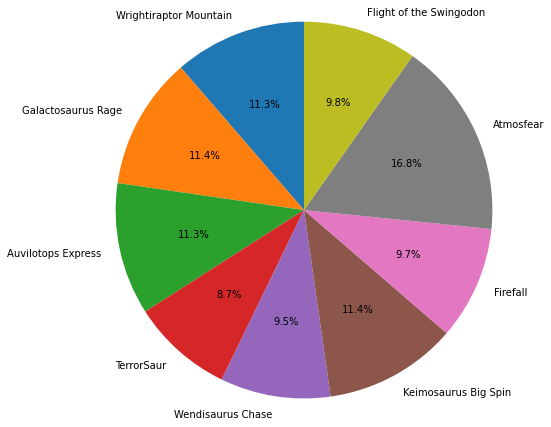

[['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Auvilotops Express', 18694], ['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Keimosaurus Big Spin', 18792], ['Firefall', 16024], ['Atmosfear', 27747], ['Flight of the Swingodon', 16093]]


In [56]:
# Graded Cell, PartID: gtMqY
# Make a Pie Chart of the visits to Thrill Ride attractions. For this question,
#  display the pie chart in the notebook and print the data used to create the
#  pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db_filename = 'readonly/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute('SELECT CAST(AttractionID AS int), Name FROM attraction WHERE Category="Thrill Rides\r";')
thrill_rides = pd.DataFrame.from_records(c.fetchall(), columns=['AttractionID', 'Attraction'])

c.execute('SELECT attraction, COUNT(*) FROM checkin WHERE attraction IN {} GROUP BY attraction;'.format(tuple(thrill_rides['AttractionID'])))
ThrillRide_Visits = pd.DataFrame.from_records(c.fetchall(), columns=['AttractionID', 'Visits'])
ThrillRide_Visits = pd.merge(thrill_rides, ThrillRide_Visits, on='AttractionID')

f = plt.figure() 
f.set_figwidth(7.5) 
f.set_figheight(7.5)

plt.pie(ThrillRide_Visits['Visits'], labels=ThrillRide_Visits['Attraction'], shadow=False, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
print(ThrillRide_Visits[['Attraction','Visits']].values.tolist())

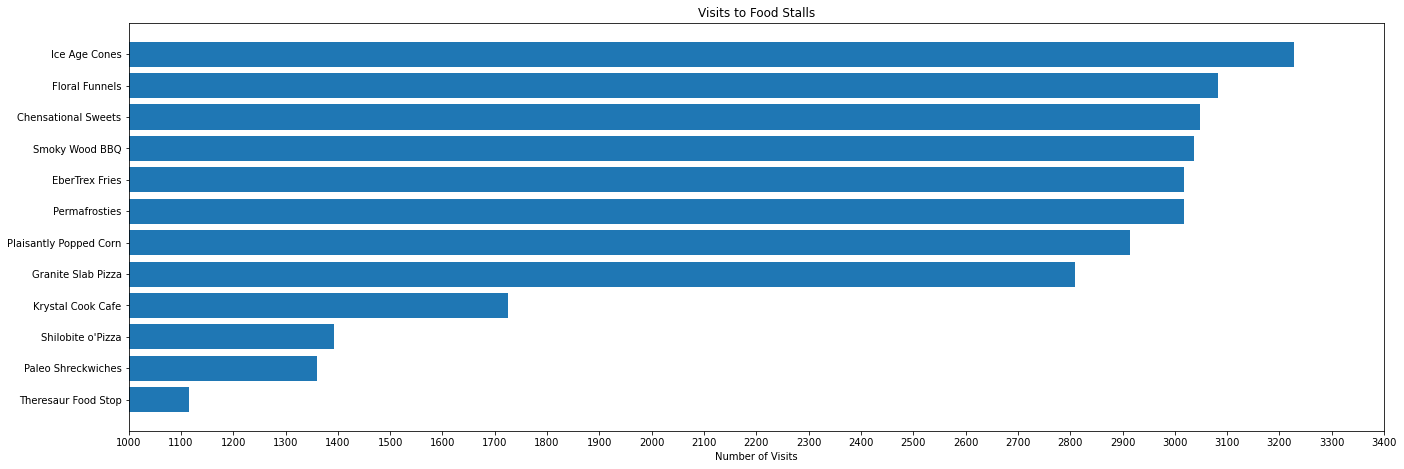

[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ["Shilobite o'Pizza", 1393], ['Krystal Cook Cafe', 1725], ['Granite Slab Pizza', 2810], ['Plaisantly Popped Corn', 2914], ['Permafrosties', 3018], ['EberTrex Fries', 3018], ['Smoky Wood BBQ', 3037], ['Chensational Sweets', 3049], ['Floral Funnels', 3083], ['Ice Age Cones', 3228]]


In [57]:
# Graded Cell, PartID: 9Ocyl
# Make a bar chart of total visits to food stalls. For this question,
#  display the bar chart in the notebook and print the data used to create the
#  bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db_filename = 'readonly/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute('SELECT CAST(AttractionID AS int), Name FROM attraction WHERE Category="Food\r";')
food_stalls = pd.DataFrame.from_records(c.fetchall(), columns=['AttractionID', 'Attraction'])

c.execute('SELECT attraction, COUNT(*) FROM checkin WHERE attraction IN {} GROUP BY attraction;'.format(tuple(food_stalls['AttractionID'])))
FoodStalls_Visits = pd.DataFrame.from_records(c.fetchall(), columns=['AttractionID', 'Visits'])
FoodStalls_Visits = pd.merge(food_stalls, FoodStalls_Visits, on='AttractionID')
FoodStalls_Visits.sort_values('Visits', inplace=True)

f = plt.figure() 
f.set_figwidth(22.5) 
f.set_figheight(7.5)

plt.barh(FoodStalls_Visits['Attraction'], FoodStalls_Visits['Visits'])
plt.xticks(np.arange(0,3500,100))
plt.xlim(xmin=1000)
plt.xlabel('Number of Visits')
plt.title('Visits to Food Stalls')
plt.show()
print(FoodStalls_Visits[['Attraction', 'Visits']].values.tolist())

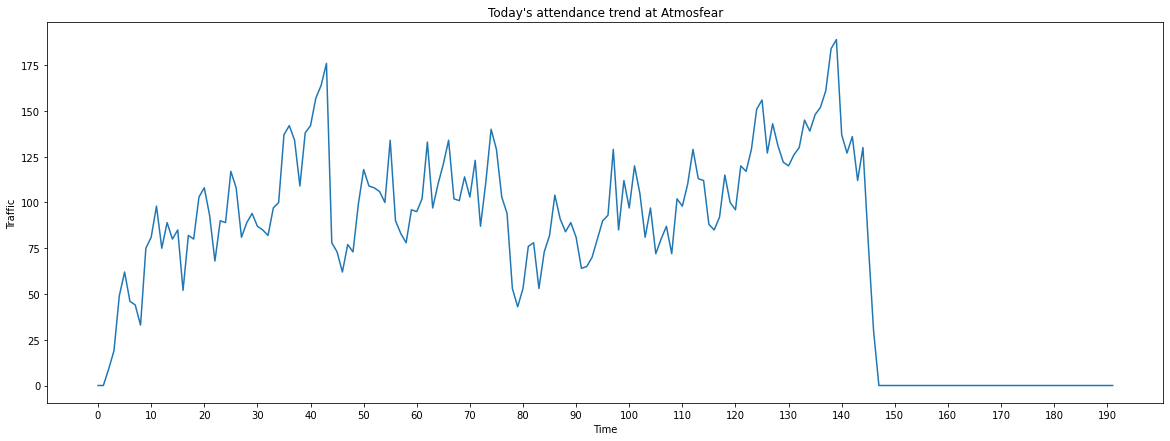

[[0, 0], [1, 0], [2, 9], [3, 19], [4, 49], [5, 62], [6, 46], [7, 44], [8, 33], [9, 75], [10, 81], [11, 98], [12, 75], [13, 89], [14, 80], [15, 85], [16, 52], [17, 82], [18, 80], [19, 103], [20, 108], [21, 93], [22, 68], [23, 90], [24, 89], [25, 117], [26, 108], [27, 81], [28, 89], [29, 94], [30, 87], [31, 85], [32, 82], [33, 97], [34, 100], [35, 137], [36, 142], [37, 134], [38, 109], [39, 138], [40, 142], [41, 157], [42, 164], [43, 176], [44, 78], [45, 73], [46, 62], [47, 77], [48, 73], [49, 99], [50, 118], [51, 109], [52, 108], [53, 106], [54, 100], [55, 134], [56, 90], [57, 83], [58, 78], [59, 96], [60, 95], [61, 102], [62, 133], [63, 97], [64, 110], [65, 121], [66, 134], [67, 102], [68, 101], [69, 114], [70, 103], [71, 123], [72, 87], [73, 111], [74, 140], [75, 129], [76, 103], [77, 94], [78, 53], [79, 43], [80, 53], [81, 76], [82, 78], [83, 53], [84, 73], [85, 82], [86, 104], [87, 91], [88, 84], [89, 89], [90, 81], [91, 64], [92, 65], [93, 70], [94, 80], [95, 90], [96, 93], [97, 12

In [66]:
# Graded Cell, PartID: 0zcEV
# Make a line chart of attendance at Atmosfear every five minutes. Again,
#  display the line chart in the notebook and print the data used to create the
#  chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def seq(string):
    ans = string.split('-')
    return ans

db_filename = 'readonly/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()
conn.create_function("SEQ", 1, seq)

c.execute('SELECT sequence FROM sequences;')
seqStrings = np.array(c.fetchall())
seqStrings = seqStrings.reshape(len(seqStrings))
seqs = pd.DataFrame([i.split('-') for i in seqStrings])
seqs.drop(range(192,seqs.shape[1]), axis=1, inplace=True)

c.execute('SELECT AttractionID FROM attraction WHERE Name="Atmosfear";')
atmosID = c.fetchone()[0]

atmosTraffic = []
for i in range(192):
    try:
        c = seqs[i].value_counts()['{}'.format(atmosID)]
    except:
        c = 0
    atmosTraffic.append((i,c))

atmosTraffic = pd.DataFrame(atmosTraffic)

f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(7)

plt.plot(atmosTraffic[0],atmosTraffic[1])
plt.xticks(np.arange(0,200,10))
plt.yticks(np.arange(0,200,25))
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Today\'s attendance trend at Atmosfear')
plt.show()

print(atmosTraffic.values.tolist())

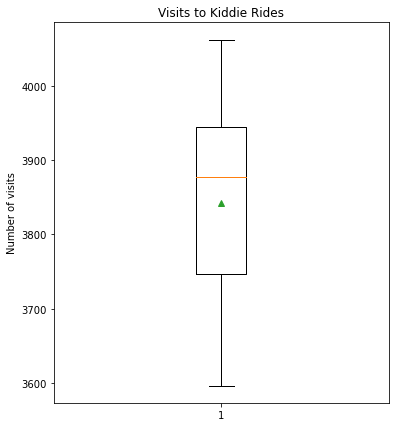

[3597, 3759, 4062, 3640, 3747, 3963, 3747, 3925, 3922, 4022, 3877]


In [74]:
# Graded Cell, PartID: zdzaT
# Make a box plot of total visits to rides in the Kiddie Rides category. For
#  this question, display the box plot in the notebook and print the number of
#  visits to each ride as a list (ex: [3, 4, 5, 6, ...])

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db_filename = 'readonly/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute('SELECT CAST(AttractionID AS int), Name FROM attraction WHERE Category="Kiddie Rides\r";')
kiddie_rides = pd.DataFrame.from_records(c.fetchall(), columns=['AttractionID', 'Attraction'])

c.execute('SELECT attraction, COUNT(*) FROM checkin WHERE attraction IN {} GROUP BY attraction;'.format(tuple(kiddie_rides['AttractionID'])))
KiddieRides_Visits = pd.DataFrame.from_records(c.fetchall(), columns=['AttractionID', 'Visits'])
KiddieRides_Visits = pd.merge(kiddie_rides, KiddieRides_Visits, on='AttractionID')

f = plt.figure()  
f.set_figheight(7)

plt.boxplot(KiddieRides_Visits['Visits'], manage_ticks=True, showmeans=True)
#plt.yticks(np.arange(3597,4062,500))
plt.ylabel('Number of visits')
plt.title('Visits to Kiddie Rides')
plt.show()
print(KiddieRides_Visits['Visits'].values.tolist())